<a href="https://colab.research.google.com/github/dnguyet06/B-i-t-p-AI/blob/main/v%C3%AD_d%E1%BB%A5_2_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 9.6 MB/s eta 0:00:00


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
#Tạo hàm input
traffic_condition = ctrl.Antecedent(np.arange(0,11,1),'traffic')
distance_to_customer = ctrl.Antecedent(np.arange(0,16,1),'distance')
order_preparation_time = ctrl.Antecedent(np.arange(0,3,1),'time')
weather_condition = ctrl.Antecedent(np.arange(0,26,1),'weather')
driver_faigue_level = ctrl.Antecedent(np.arange(0,11,1),'driver_level')
#Tạo hàm output
estimated_delivery_time = ctrl.Consequent(np.arange(0,41,1),'time')
incentive_bonus = ctrl.Consequent(np.arange(0,16,1),'incentive')
driver_performance_rating = ctrl.Consequent(np.arange(1,6,1),'satisfaction')
#Nhập dữ liệu
traffic_condition['low']=fuzz.trimf(traffic_condition.universe,[0,0,5])
traffic_condition['normal']=fuzz.trimf(traffic_condition.universe,[2,5,8])
traffic_condition['high']=fuzz.trimf(traffic_condition.universe,[5,10,10])
distance_to_customer['short']=fuzz.trimf(distance_to_customer.universe,[0,0,4])
distance_to_customer['medium']=fuzz.trimf(distance_to_customer.universe,[0,7,15])
distance_to_customer['long']=fuzz.trimf(distance_to_customer.universe,[7,15,15])
order_preparation_time['short']=fuzz.trimf(order_preparation_time.universe,[0,0,2])
order_preparation_time['medium']=fuzz.trimf(order_preparation_time.universe,[0,1,2])
order_preparation_time['long']=fuzz.trimf(order_preparation_time.universe,[1,2,2])
weather_condition['sunny']=fuzz.trimf(weather_condition.universe,[0,0,6])
weather_condition['cloudy']=fuzz.trimf(weather_condition.universe,[0,12,25])
weather_condition['rainy']=fuzz.trimf(weather_condition.universe,[15,25,25])
driver_faigue_level['low']=fuzz.trimf(driver_faigue_level.universe,[0,0,5])
driver_faigue_level['medium']=fuzz.trimf(driver_faigue_level.universe,[3,5,7])
driver_faigue_level['high']=fuzz.trimf(driver_faigue_level.universe,[6,10,10])
incentive_bonus['low']=fuzz.trimf(incentive_bonus.universe,[0,0,5])
incentive_bonus['medium']=fuzz.trimf(incentive_bonus.universe,[3,5,7])
incentive_bonus['high']=fuzz.trimf(incentive_bonus.universe,[6,10,10])
estimated_delivery_time['short']=fuzz.trimf(estimated_delivery_time.universe,[0,0,20])
estimated_delivery_time['medium']=fuzz.trimf(estimated_delivery_time.universe,[15,25,35])
estimated_delivery_time['long']=fuzz.trimf(estimated_delivery_time.universe,[30,40,40])
driver_performance_rating['l']=fuzz.trimf(driver_performance_rating.universe,[1,2,3])
driver_performance_rating['m']=fuzz.trimf(driver_performance_rating.universe,[2,3,4])
driver_performance_rating['h']=fuzz.trimf(driver_performance_rating.universe,[3,4,5])

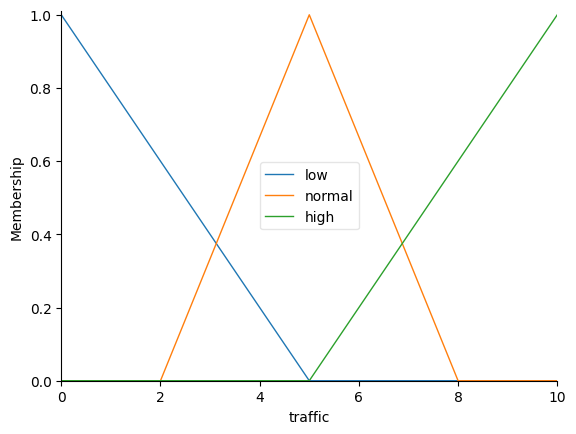

In [ ]:
traffic_condition.view()

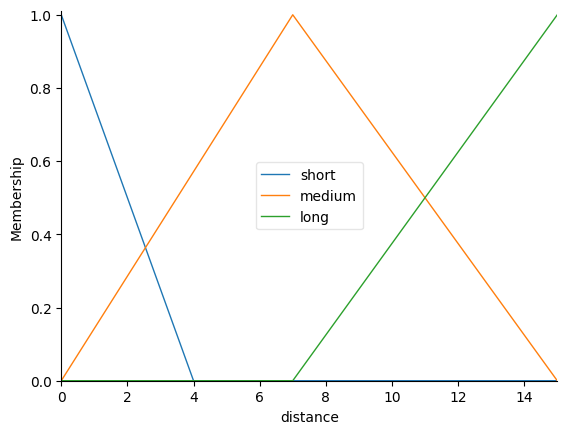

In [ ]:
distance_to_customer.view()

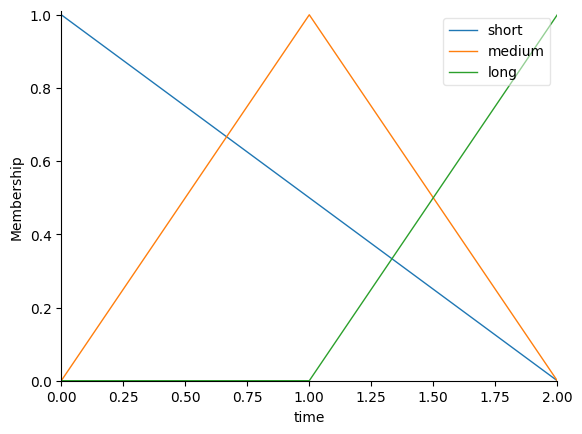

In [ ]:
order_preparation_time.view()

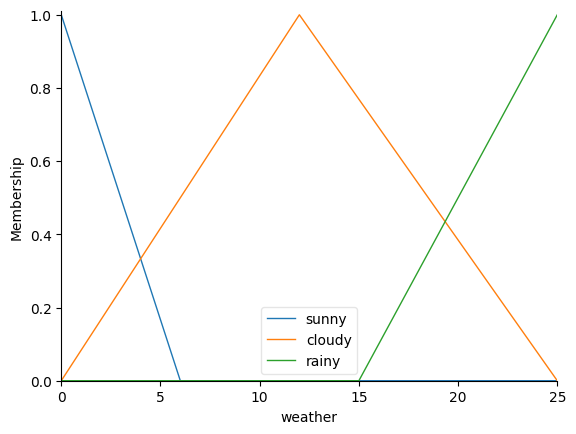

In [ ]:
weather_condition.view()

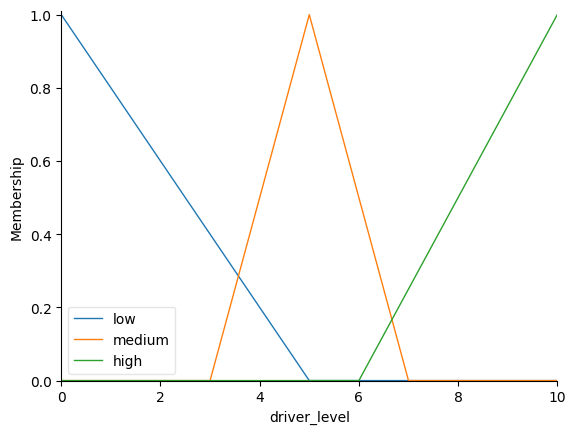

In [ ]:
driver_faigue_level.view()

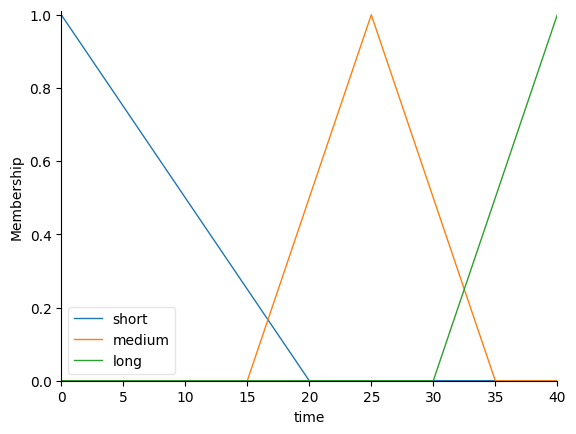

In [ ]:
estimated_delivery_time.view()

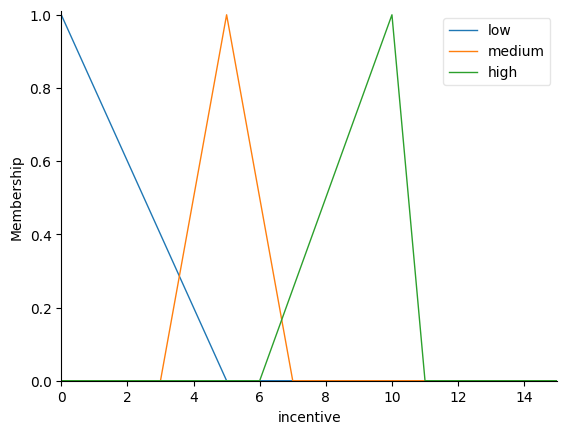

In [ ]:
incentive_bonus.view()

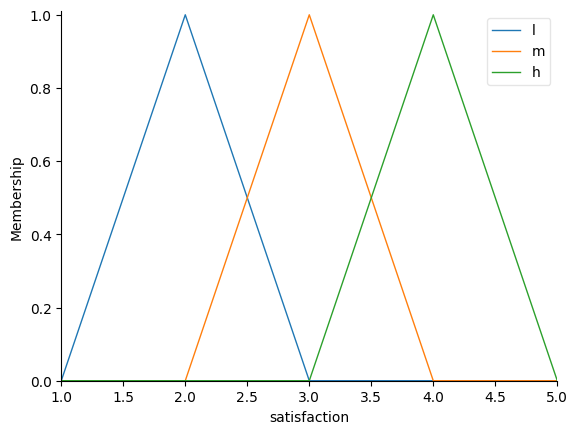

In [ ]:
driver_performance_rating.view()

In [ ]:
#Luật dựa trên giao thông và khoảng cách
rule1=ctrl.Rule(traffic_condition['low']&distance_to_customer['short'],estimated_delivery_time['short'])
rule2=ctrl.Rule(traffic_condition['normal']&distance_to_customer['medium'],estimated_delivery_time['medium'])
rule3=ctrl.Rule(traffic_condition['high']&distance_to_customer['long'],estimated_delivery_time['long'])
#Luật dựa trên thời tiết và thưởng khuyến khích
rule4=ctrl.Rule(weather_condition['sunny'],incentive_bonus['low'])
rule5=ctrl.Rule(weather_condition['cloudy'],incentive_bonus['medium'])
rule6=ctrl.Rule(weather_condition['rainy'],incentive_bonus['high'])
#Luật dựa trên thời gian chuẩn bị đơn hàng và giao hàng
rule7=ctrl.Rule(order_preparation_time['short']&traffic_condition['low'],estimated_delivery_time['short'])
rule8=ctrl.Rule(order_preparation_time['medium']&traffic_condition['normal'],estimated_delivery_time['medium'])
rule9=ctrl.Rule(order_preparation_time['long']&traffic_condition['high'],estimated_delivery_time['long'])
#Luật dựa trên mức độ mệt mỏi và hạng hiệu suất
rule10=ctrl.Rule(driver_faigue_level['low'],driver_performance_rating['h'])
rule11=ctrl.Rule(driver_faigue_level['medium'],driver_performance_rating['m'])
rule12=ctrl.Rule(driver_faigue_level['high'],driver_performance_rating['l'])
#Luật kết hợp
rule13=ctrl.Rule(distance_to_customer['long']&weather_condition['rainy']&traffic_condition['high'],estimated_delivery_time['long'],driver_performance_rating['h'])
rule14=ctrl.Rule(distance_to_customer['short']&weather_condition['sunny']&traffic_condition['low'],estimated_delivery_time['short'],driver_performance_rating['l'])
rule15=ctrl.Rule(driver_faigue_level['high']&traffic_condition['high'],driver_performance_rating['l'],estimated_delivery_time['long'])


Thời gian dự kiến: 28.57459756150475
Thưởng khuyến khích: 2.3782505910165486
Hạng hiệu suất: 1.9999999999999998


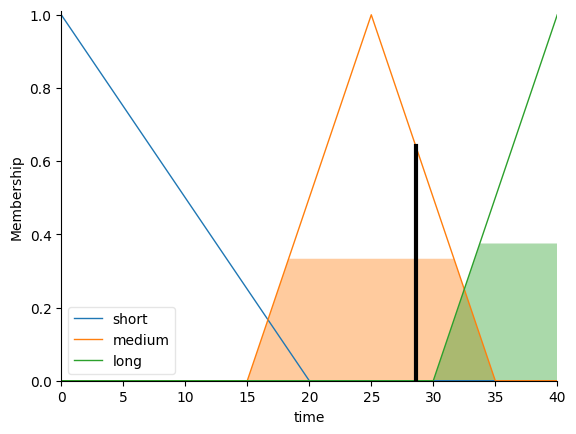

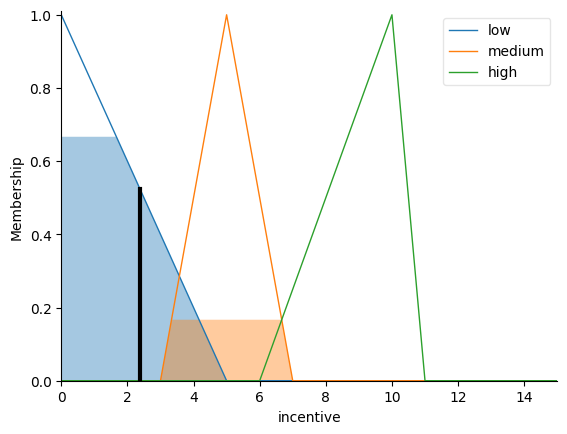

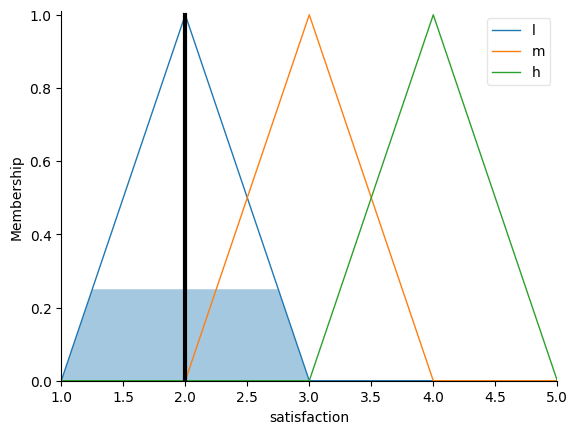

In [ ]:
#mô phỏng và điều kiện
fuzzy_system = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15])
sim = ctrl.ControlSystemSimulation(fuzzy_system)
sim.input['traffic']=7
sim.input['distance']=10
sim.input['weather']=2
sim.input['time']=1
sim.input['driver_level']=7
sim.compute()
print('Thời gian dự kiến:',sim.output['time'])
print('Thưởng khuyến khích:',sim.output['incentive'])
print('Hạng hiệu suất:',sim.output['satisfaction'])
estimated_delivery_time.view(sim)
incentive_bonus.view(sim)
driver_performance_rating.view(sim)